import liberaries

In [ ]:
import pandas as pd
import ruptures as rpt
import matplotlib.pyplot as plt

load the data

In [31]:
brent_oil_price = pd.read_csv(r'C:\Users\befekadum\Documents\10x acadamy\week10\Change_point_analysis-\data\Copy of BrentOilPrices.csv')

In [32]:
brent_oil_price.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [33]:
brent_oil_price['Date'] = pd.to_datetime(brent_oil_price['Date'])
brent_oil_price = brent_oil_price.sort_values(by ='Date')
brent_oil_price = brent_oil_price.set_index('Date')



C:\Users\befekadum\AppData\Local\Temp\ipykernel_1676\69885449.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_price['Date'] = pd.to_datetime(brent_oil_price['Date'])


In [34]:
brent_oil_price

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [52]:
# Select the model:
model = "rbf"  # Mean shift model
algo = rpt.Pelt(model=model).fit(brent_oil_price)

In [53]:
penalty = 10  
change_points = algo.predict(pen=penalty)

In [54]:

# Convert to numpy array
data_np = brent_oil_price.values

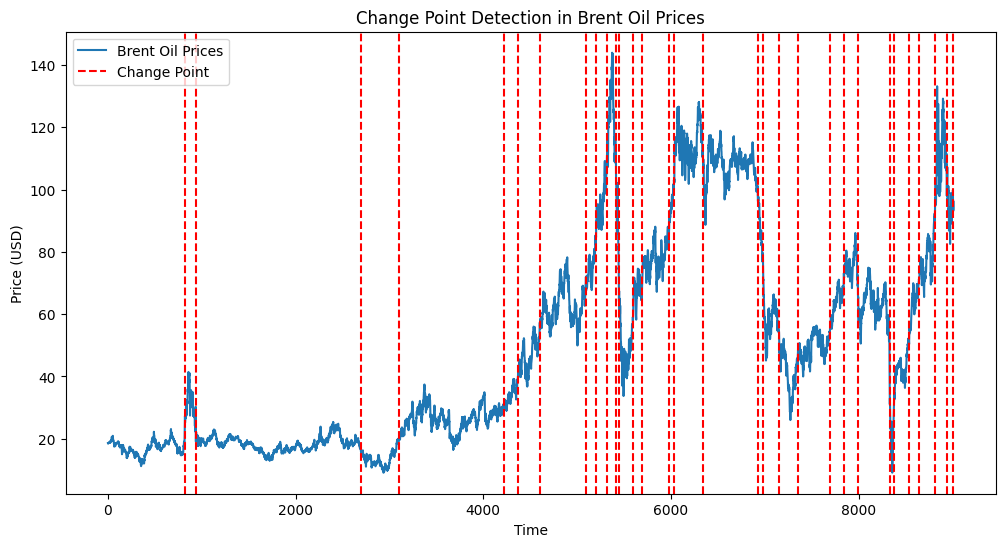

In [55]:
# Visualize the detected change points
plt.figure(figsize=(12, 6))
plt.plot(data_np, label="Brent Oil Prices")
for cp in change_points:
    plt.axvline(cp, color="red", linestyle="--", label="Change Point" if cp == change_points[0] else "")
plt.title("Change Point Detection in Brent Oil Prices")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

